In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
path_to_dataset=r"E:\Datasets\SpotifyTracks\spotify_tracks.csv"

df=pd.read_csv(path_to_dataset)
df

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.02410,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.08510,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.03110,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.22700,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.01530,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62312,3eHDwMQYPEziy2DWRBNoLv,Sani - G.O.A.T Remix,"Arvind Raj, Sheezay, Music Kitchen, FSPROD Vin...",2021,30,https://i.scdn.co/image/ab67616d0000b273819d23...,Sani (G.O.A.T Remix),0.08490,0.877,359718.0,...,7.0,0.1100,-11.458,1.0,0.3530,100.024,4.0,0.504,https://open.spotify.com/track/3eHDwMQYPEziy2D...,Tamil
62313,5hHtCqkNv5eo99OrEFFcgS,Life of Bachelor,"A H Kaashif, Navakkarai Naveen Prabanjam, Asal...",2021,30,https://i.scdn.co/image/ab67616d0000b2736cd651...,Bachelor (Original Motion Picture Soundtrack),0.07880,0.833,154364.0,...,8.0,0.2670,-5.061,1.0,0.0813,110.041,4.0,0.524,https://open.spotify.com/track/5hHtCqkNv5eo99O...,Tamil
62314,08foF9YHgKmIgOy3xMWRZy,Yo Baby,"Rakesh Ambigapathy, Asal Kolaar, MC Vickey",2021,18,https://i.scdn.co/image/ab67616d0000b27300da25...,Yo Baby,0.00918,0.842,234000.0,...,7.0,0.0790,-5.855,1.0,0.1370,122.038,4.0,0.669,https://open.spotify.com/track/08foF9YHgKmIgOy...,Tamil
62315,2wLFbVlQGKJSd9lwzwL47F,Fast Fast Vadiley,"Asal Kolaar, Priyadarshan Balasubramanian",2021,1,https://i.scdn.co/image/ab67616d0000b273e051e1...,Arjuna Phalguna,0.10100,0.682,180807.0,...,1.0,0.3200,-6.061,1.0,0.2850,74.993,4.0,0.439,https://open.spotify.com/track/2wLFbVlQGKJSd9l...,Tamil


In [3]:
#Data exploration
df.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

In [4]:
# check missing values

missing_values=df.isnull().sum()
missing_values

track_id            0
track_name          0
artist_name         0
year                0
popularity          0
artwork_url         0
album_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
track_url           0
language            0
dtype: int64

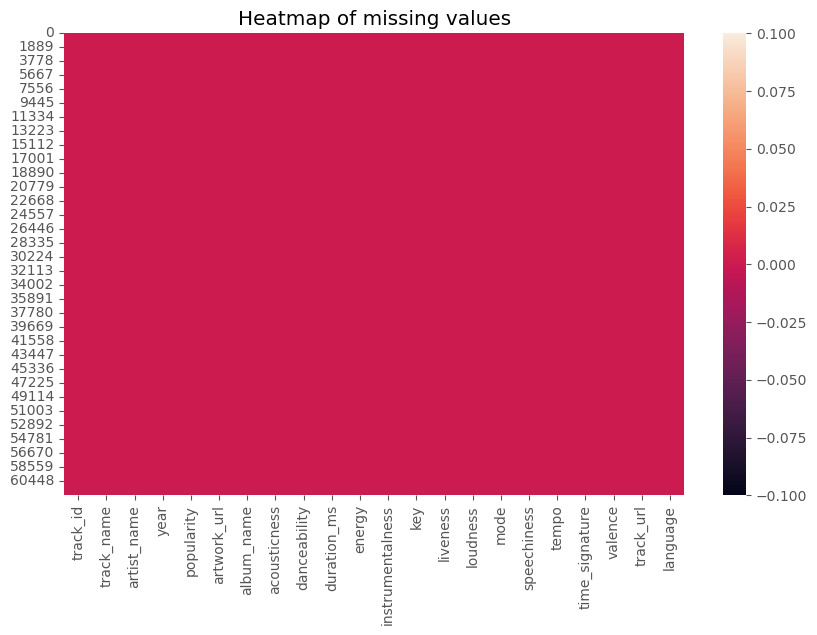

In [5]:
#visualise missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Heatmap of missing values")
plt.show()

In [6]:
#check for duplicates

duplicates=df.duplicated().sum()
duplicates

78

In [7]:
#duplicates removed
df10_nodup=df.drop_duplicates()

df10_nodup.shape

(62239, 22)

### Numerical DATA df20

In [8]:
df20_numerical_data=df10_nodup.select_dtypes(include=["int64","float64"])
df20_numerical_data

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2024,59,0.02410,0.753,97297.0,0.970,0.055300,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459
1,2024,47,0.08510,0.780,207369.0,0.793,0.000000,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821
2,2024,35,0.03110,0.457,82551.0,0.491,0.000000,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598
3,2024,24,0.22700,0.718,115831.0,0.630,0.000727,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362
4,2024,22,0.01530,0.689,129621.0,0.748,0.000001,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62312,2021,30,0.08490,0.877,359718.0,0.469,0.000000,7.0,0.1100,-11.458,1.0,0.3530,100.024,4.0,0.504
62313,2021,30,0.07880,0.833,154364.0,0.689,0.000000,8.0,0.2670,-5.061,1.0,0.0813,110.041,4.0,0.524
62314,2021,18,0.00918,0.842,234000.0,0.765,0.000000,7.0,0.0790,-5.855,1.0,0.1370,122.038,4.0,0.669
62315,2021,1,0.10100,0.682,180807.0,0.861,0.000000,1.0,0.3200,-6.061,1.0,0.2850,74.993,4.0,0.439


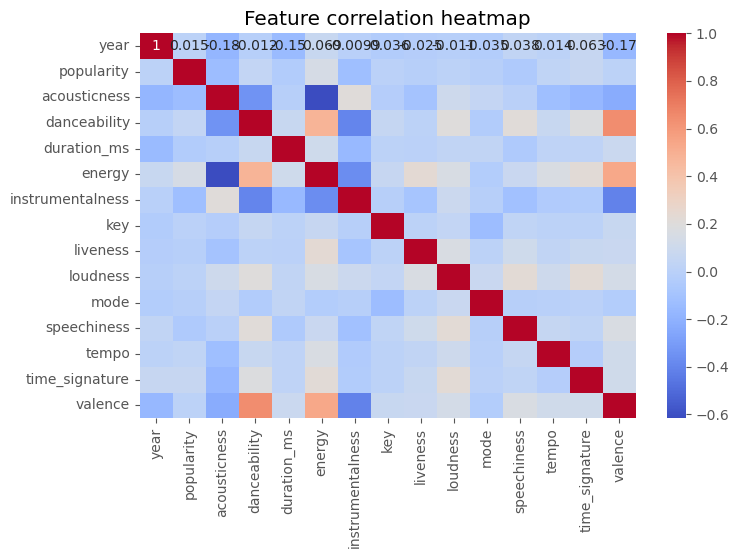

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df20_numerical_data.corr(),annot=True,cmap="coolwarm")
plt.title("Feature correlation heatmap")
plt.show()

# correlation is scale invariant, no need to normalise first

In [10]:
# take time hypothesizing which features are important and which are not manually
# dont restrict yourself to this df, maybe another dataset can help?
# which features do I think represent the data well.
# are those features available here?
# what is the ultimate purpose of this recommendation system?
# just because you have a feature doesnt make it useful eg: primary key like track_id
# numerical features best for distance based algorithms
# 

In [19]:
df20_numerical_data.describe()

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,62239.000000,62239.000000,62239.000000,62239.000000,6.223900e+04,62239.000000,62239.000000,62239.000000,62239.000000,62239.000000,62239.000000,62239.000000,62239.000000,62239.000000,62239.000000
mean,2014.417969,15.357589,0.362342,0.596768,2.426034e+05,0.602416,0.146054,5.101544,0.194172,-65.174856,0.586063,0.087741,117.923713,3.857003,0.495246
std,9.648517,18.630494,0.314674,0.186262,1.130210e+05,0.246207,0.307637,3.553433,0.172075,2370.534662,0.493682,0.115208,28.505003,0.502881,0.264785
min,1971.000000,0.000000,-1.000000,-1.000000,5.000000e+03,-1.000000,-1.000000,-1.000000,-1.000000,-100000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2011.000000,0.000000,0.067100,0.497000,1.922400e+05,0.440000,0.000000,2.000000,0.093200,-10.729000,0.000000,0.036700,95.940000,4.000000,0.292000
50%,2017.000000,7.000000,0.286000,0.631000,2.363110e+05,0.639000,0.000025,5.000000,0.125000,-7.506000,1.000000,0.048900,117.990000,4.000000,0.507000
75%,2022.000000,26.000000,0.633000,0.730000,2.863035e+05,0.803000,0.015100,8.000000,0.243000,-5.455000,1.000000,0.089100,135.068500,4.000000,0.710000
max,2024.000000,93.000000,0.996000,0.986000,4.581483e+06,1.000000,0.999000,11.000000,0.998000,1.233000,1.000000,0.959000,239.970000,5.000000,0.995000


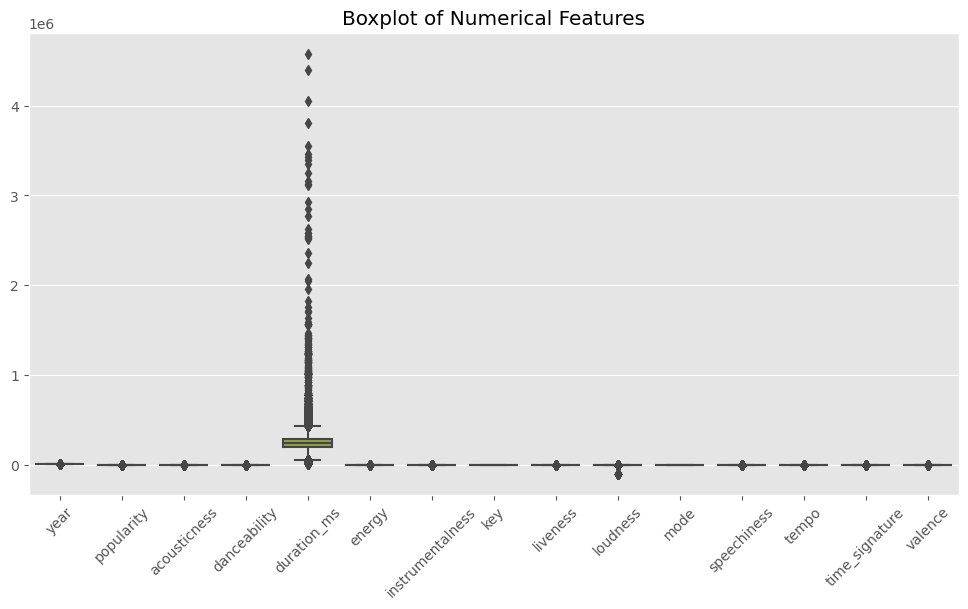

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df20_numerical_data)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [13]:
'''
df1_numerical_data.plot(kind='density', subplots=True, layout=(3, 2), figsize=(15, 12), sharex=False)
plt.suptitle("KDE of Numerical Features", fontsize=16)
plt.show()

'''

'\ndf1_numerical_data.plot(kind=\'density\', subplots=True, layout=(3, 2), figsize=(15, 12), sharex=False)\nplt.suptitle("KDE of Numerical Features", fontsize=16)\nplt.show()\n\n'

In [14]:
'''
df1_numerical_data.plot(
    kind='density', 
    subplots=True, 
    layout=(5, 3),  # Adjust rows and columns for 15 features
    figsize=(15, 12), 
    sharex=False
)
plt.suptitle("KDE of Numerical Features", fontsize=16)
plt.show()
'''

'\ndf1_numerical_data.plot(\n    kind=\'density\', \n    subplots=True, \n    layout=(5, 3),  # Adjust rows and columns for 15 features\n    figsize=(15, 12), \n    sharex=False\n)\nplt.suptitle("KDE of Numerical Features", fontsize=16)\nplt.show()\n'

## Feature Selection (manually after checking correlation)
Since there were only 16 params its possible

In [22]:
selected_features=["danceability","energy","valence","tempo","acousticness","loudness","speechiness","time_signature"]

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
matrix_normalised_features=scaler.fit_transform(df20_numerical_data[selected_features])
print(matrix_normalised_features)

matrix_normalised_features

[[0.88267875 0.985      0.73132832 ... 0.99992773 0.56304237 0.83333333]
 [0.89627392 0.8965     0.91278195 ... 0.99993093 0.55906075 0.66666667]
 [0.73363545 0.7455     0.80100251 ... 0.9998983  0.58856559 0.83333333]
 ...
 [0.92749245 0.8825     0.83659148 ... 0.99992912 0.58039816 0.83333333]
 [0.8469285  0.9305     0.72130326 ... 0.99992706 0.65594691 0.83333333]
 [0.91490433 0.9515     0.92080201 ... 0.99991414 0.57018887 0.83333333]]


array([[0.88267875, 0.985     , 0.73132832, ..., 0.99992773, 0.56304237,
        0.83333333],
       [0.89627392, 0.8965    , 0.91278195, ..., 0.99993093, 0.55906075,
        0.66666667],
       [0.73363545, 0.7455    , 0.80100251, ..., 0.9998983 , 0.58856559,
        0.83333333],
       ...,
       [0.92749245, 0.8825    , 0.83659148, ..., 0.99992912, 0.58039816,
        0.83333333],
       [0.8469285 , 0.9305    , 0.72130326, ..., 0.99992706, 0.65594691,
        0.83333333],
       [0.91490433, 0.9515    , 0.92080201, ..., 0.99991414, 0.57018887,
        0.83333333]])

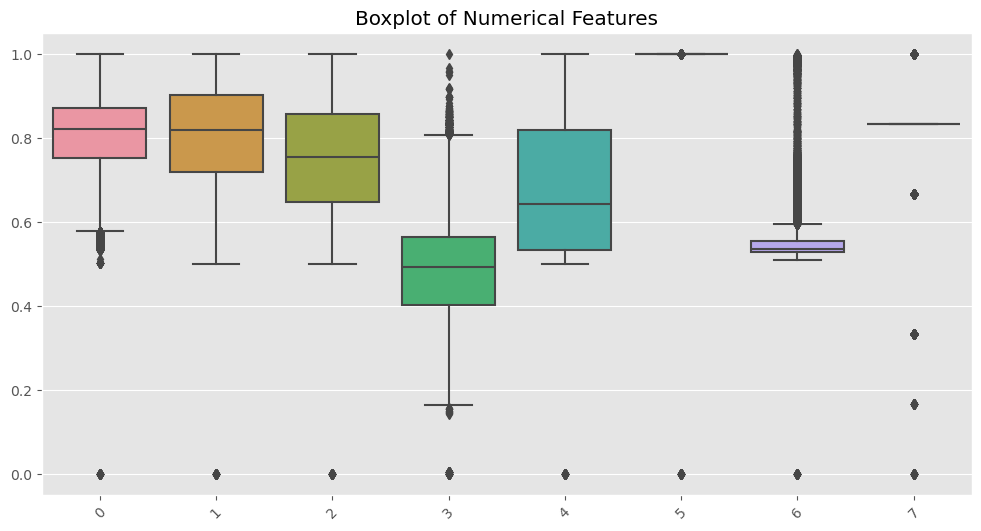

In [36]:
# Now all selected features values range from 0 to 1.

plt.figure(figsize=(12, 6))
sns.boxplot(data=matrix_normalised_features)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

### Obtained Normalised DF. df30. This dataset is cleaned and ready to be trained on.

In [38]:
#attach column names back to df
df30_normalised=pd.DataFrame(matrix_normalised_features,columns=selected_features)
df30_normalised

,danceability,energy,valence,tempo,acousticness,loudness,speechiness,time_signature
0,0.882679,0.9850,0.731328,0.464776,0.513076,0.999928,0.563042,0.833333
1,0.896274,0.8965,0.912782,0.688862,0.543637,0.999931,0.559061,0.666667
2,0.733635,0.7455,0.801003,0.709615,0.516583,0.999898,0.588566,0.833333
3,0.865055,0.8150,0.682707,0.709615,0.614729,0.999877,0.737621,0.833333
4,0.850453,0.8740,0.798496,0.539324,0.508667,0.999891,0.591118,0.833333
...,...,...,...,...,...,...,...,...
62234,0.945116,0.7345,0.753885,0.419239,0.543537,0.999873,0.690658,0.833333
62235,0.922961,0.8445,0.763910,0.460808,0.540481,0.999937,0.551965,0.833333
62236,0.927492,0.8825,0.836591,0.510595,0.505601,0.999929,0.580398,0.833333
62237,0.846928,0.9305,0.721303,0.315363,0.551603,0.999927,0.655947,0.833333


In [19]:
# find similarities between the songs using cosine similarity

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
'''
similarity_matrix=cosine_similarity(df3_normalised)
similarity_matrix
'''
#60000 rows takes 2 minutes but takes up whole RAM, bad idea

array([[1.        , 0.98788648, 0.98473518, ..., 0.99737014, 0.99620427,
        0.99526327],
       [0.98788648, 1.        , 0.99134489, ..., 0.99308813, 0.97799195,
        0.98710517],
       [0.98473518, 0.99134489, 1.        , ..., 0.99031596, 0.97665926,
        0.98027086],
       ...,
       [0.99737014, 0.99308813, 0.99031596, ..., 1.        , 0.99320891,
        0.99646914],
       [0.99620427, 0.97799195, 0.97665926, ..., 0.99320891, 1.        ,
        0.99523194],
       [0.99526327, 0.98710517, 0.98027086, ..., 0.99646914, 0.99523194,
        1.        ]])

### TRying out a sample subset of the data

In [39]:
sdf = df30_normalised.sample(n=10000, random_state=42)
sdf

,danceability,energy,valence,tempo,acousticness,loudness,speechiness,time_signature
59405,0.724572,0.5253,0.521153,0.369270,0.952405,0.999758,0.528025,0.833333
38898,0.703424,0.8315,0.795990,0.348276,0.701904,0.999921,0.557580,0.833333
35511,0.791541,0.8610,0.933835,0.452368,0.501078,0.999886,0.529301,0.833333
53776,0.927492,0.7990,0.983459,0.522924,0.520842,0.999901,0.533435,0.833333
44054,0.634945,0.6340,0.526617,0.564485,0.752004,0.999775,0.536141,0.833333
...,...,...,...,...,...,...,...,...
10371,0.634945,0.8015,0.605013,0.660352,0.780561,0.999920,0.529199,0.833333
11778,0.867069,0.8540,0.660150,0.583479,0.702906,0.999844,0.590097,0.833333
12263,0.905337,0.8590,0.775439,0.398469,0.627756,0.999882,0.559163,0.833333
26814,0.717523,0.7145,0.686717,0.585314,0.948397,0.999922,0.526953,0.666667


## Cosine Similarity Matrix

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
matrix_csm=cosine_similarity(sdf)

In [44]:
print(matrix_csm)

[[1.         0.97340383 0.94521603 ... 0.96660513 0.98482456 0.95941949]
 [0.97340383 1.         0.99158016 ... 0.99500745 0.98073422 0.99651147]
 [0.94521603 0.99158016 1.         ... 0.99384758 0.96372181 0.99579718]
 ...
 [0.96660513 0.99500745 0.99384758 ... 1.         0.97526688 0.99814154]
 [0.98482456 0.98073422 0.96372181 ... 0.97526688 1.         0.97111985]
 [0.95941949 0.99651147 0.99579718 ... 0.99814154 0.97111985 1.        ]]


In [51]:
# Convert to DataFrame for easier viewing
df40_sm = pd.DataFrame(matrix_csm,index=sdf.index, columns=sdf.index)

In [52]:
df40_sm

,59405,38898,35511,53776,44054,32379,46839,23819,59427,41775,...,55105,42516,16947,22062,41522,10371,11778,12263,26814,32961
59405,1.000000,0.973404,0.945216,0.945212,0.987931,0.960156,0.989372,0.981611,0.965276,0.952697,...,0.948830,0.989632,0.937718,0.988437,0.962037,0.976657,0.973840,0.966605,0.984825,0.959419
38898,0.973404,1.000000,0.991580,0.985742,0.981894,0.997523,0.990928,0.998624,0.969837,0.982796,...,0.993571,0.989875,0.967662,0.983364,0.991430,0.983491,0.989671,0.995007,0.980734,0.996511
35511,0.945216,0.991580,1.000000,0.997421,0.966561,0.995571,0.977312,0.984296,0.965639,0.992869,...,0.998034,0.974535,0.968245,0.969261,0.988124,0.972036,0.985050,0.993848,0.963722,0.995797
53776,0.945212,0.985742,0.997421,1.000000,0.964422,0.991035,0.976588,0.978097,0.964521,0.998161,...,0.993937,0.976073,0.971089,0.969985,0.987711,0.968245,0.984739,0.992666,0.964070,0.990754
44054,0.987931,0.981894,0.966561,0.964422,1.000000,0.970032,0.995573,0.983691,0.993599,0.970010,...,0.968864,0.985054,0.945319,0.996793,0.968172,0.996377,0.990255,0.977427,0.989260,0.974963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10371,0.976657,0.983491,0.972036,0.968245,0.996377,0.972521,0.994598,0.981933,0.993418,0.970771,...,0.975935,0.980901,0.950701,0.995885,0.973275,1.000000,0.992601,0.978811,0.990711,0.979129
11778,0.973840,0.989671,0.985050,0.984739,0.990255,0.986354,0.995144,0.986911,0.986869,0.986547,...,0.989295,0.987865,0.968443,0.993871,0.982574,0.992601,1.000000,0.994185,0.986098,0.991424
12263,0.966605,0.995007,0.993848,0.992666,0.977427,0.996916,0.988665,0.991904,0.969777,0.990802,...,0.996523,0.987713,0.973868,0.982295,0.988997,0.978811,0.994185,1.000000,0.975267,0.998142
26814,0.984825,0.980734,0.963722,0.964070,0.989260,0.969836,0.994718,0.981551,0.976167,0.968538,...,0.967465,0.990551,0.969007,0.995068,0.983645,0.990711,0.986098,0.975267,1.000000,0.971120


In [67]:
def recommend_songs(track_id,similarity_matrix,top_n=4):
    if track_id not in similarity_matrix.index:
        return "Track id unavailable in sm"

    similarity_scores=similarity_matrix.loc[track_id] 
    # will return a kinda dict with

    similar_tracks = similarity_scores.sort_values(ascending=False).iloc[1:top_n+1]

    return similar_tracks.index

In [79]:
your_song_id=10371
new_ids=recommend_songs(your_song_id,df40_sm,5)
new_ids

Index([10371, 2266, 44401, 36690, 17832], dtype='int64')

In [80]:
your_song_details=df.loc[your_song_id,["track_name","artist_name"]]
display(your_song_details)
details = df.loc[new_ids, ["track_name", "artist_name"]]
details

track_name            Light Upon Light
artist_name    A.R. Rahman, Sami Yusuf
Name: 10371, dtype: object

,track_name,artist_name
10371,Light Upon Light,"A.R. Rahman, Sami Yusuf"
2266,Rise of Laththi,Yuvan Shankar Raja
44401,503,"Hans Zimmer, Joshua Bell, Nick Glennie-Smith"
36690,Poiva Maghale,"Vijay Yesudas, Na.Muthukumar"
17832,Maranthuvidu (Karaoke Track),Shankar Mahadevan


In [84]:
#Export

df40_sm.to_pickle("export_similarity_matrix.pkl")
df.to_csv("export_dataset.csv", index=False)

In [83]:
sdf

,danceability,energy,valence,tempo,acousticness,loudness,speechiness,time_signature
59405,0.724572,0.5253,0.521153,0.369270,0.952405,0.999758,0.528025,0.833333
38898,0.703424,0.8315,0.795990,0.348276,0.701904,0.999921,0.557580,0.833333
35511,0.791541,0.8610,0.933835,0.452368,0.501078,0.999886,0.529301,0.833333
53776,0.927492,0.7990,0.983459,0.522924,0.520842,0.999901,0.533435,0.833333
44054,0.634945,0.6340,0.526617,0.564485,0.752004,0.999775,0.536141,0.833333
...,...,...,...,...,...,...,...,...
10371,0.634945,0.8015,0.605013,0.660352,0.780561,0.999920,0.529199,0.833333
11778,0.867069,0.8540,0.660150,0.583479,0.702906,0.999844,0.590097,0.833333
12263,0.905337,0.8590,0.775439,0.398469,0.627756,0.999882,0.559163,0.833333
26814,0.717523,0.7145,0.686717,0.585314,0.948397,0.999922,0.526953,0.666667


RangeIndex(start=0, stop=62317, step=1)